In [1]:
strategy_name = '鹏晖量化1号'

In [2]:
import sys
sys.path.append("C:\Program Files\Tinysoft\Analyse.NET")
sys.path.append(r"C:\Users\xudong\Documents\github\coresearch\funcs")
import pymongo
import numpy as np
import pickle
import time
import datetime
import copy
import pandas as pd
from operator import itemgetter
import TSLPy3 as tsl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import talib
import importlib
import rschLib

np.set_printoptions(formatter={'float_kind': "{:.6f}".format})
client = pymongo.MongoClient('localhost', 27017)
db = client.quanLiang
dbt = client.tinySoftData

with open(r"d:\pkl\dailyBarMtx.pkl", 'rb+') as f:
    z = pickle.load(f)
dtes = z['dtes']
dtes = np.array(dtes).astype(np.int)
tkrs = list(z['tkrs'])
open_mtx = z['open_mtx']
high_mtx = z['high_mtx']
low_mtx = z['low_mtx']
close_mtx = z['close_mtx']

k = close_mtx==0
close_mtx = rschLib.zero2pre(close_mtx)
open_mtx[k]=close_mtx[k]
high_mtx[k]=close_mtx[k]
low_mtx[k]=close_mtx[k]

name = z['name']
belong = z['belong']
shenwan1 = z['shenwan1']
shenwan2 = z['shenwan2']
shenwan3 = z['shenwan3']
vol_mtx = z['vol_mtx']
amount_mtx = z['amount_mtx']


In [3]:
dtes[-1]

20201023

In [47]:
maxD = 3

In [48]:
dd = list(dbt.minuteBarStock.find({'ticker':'SH601988', 'dateAsInt':{'$gte':int(20200106), '$lte':int(20200109)}}, {'dateTime':1}))
timeAsFloat = []
for x in dd:
    l  = str(x['dateTime']+datetime.timedelta(hours=8))
    dl = float(l[0:4]+l[5:7]+l[8:10]+'.'+l[11:13]+l[14:16]+l[17:19])
    timeAsFloat.append(dl)
timeAsFloat=np.round(np.array(sorted(list(set([x - int(x) for x in timeAsFloat])))), 6)
timeLabels = []
dayOff = []
for i in range(maxD):
    for x in timeAsFloat:
        s = str(int(x*1e4))
        if len(s)<4:
            s='0'+s
        timeLabels.append('第'+str(i+1)+'天'+s[:2]+':'+s[2:4])
        dayOff.append(i)
timeAsFloat = list(timeAsFloat)*maxD
t = np.round(np.array(sorted(list(set([x - int(x) for x in timeAsFloat])))), 6)
maxM = t.shape[0] * maxD

In [49]:
trades = list(db.strategyBackTestTrades.find({'strategy_name':strategy_name}))
tradesUsed = []
Po = []
Ph = []
Pl = []
Pc = []
for (i,x) in enumerate(trades):
    #if (x['name'] in list(name)):
    p = list(name).index(x['name'])
    ticker = tkrs[p]
    d0 = x['dateIn']
    q = list(dtes).index(d0)
    j = np.min((q+maxD, dtes.shape[0]-1))
    d1 = dtes[j]
    dd = list(dbt.minuteBarStock.find({'ticker':ticker, 'dateAsInt':{'$gte':int(d0), '$lt':int(d1)}}, {'open':1, 'high':1, 'low':1,'close':1, 'dateTime':1}).sort([('dateTime',1)]))
    if dd==[]:
        continue
    tradesUsed.append(x)
    q = np.array([x['open'] for x in dd])
    print(i, '/', len(trades),len(q),dd[0]['dateTime'],dd[-1]['dateTime'])
    z = np.min((len(q),maxM))
    m = np.zeros(maxM)
    m[:z] = q[:z]
    m[z:] = m[z-1]
    Po.append(m)
    #q = np.array([x['high'] for x in dd])
    #z = np.min((len(q),maxM))
    #m = np.zeros(maxM)
    #m[:z]=q[:z]
    #m[z:]=m[z-1]
    #Ph.append(m)
    #q = np.array([x['low'] for x in dd])
    #z = np.min((len(q),maxM))
    #m = np.zeros(maxM)
    #m[:z]=q[:z]
    #m[z:]=m[z-1]
    #Pl.append(m)
    #q = np.array([x['close'] for x in dd])
    #z = np.min((len(q),maxM))
    #m = np.zeros(maxM)
    #m[:z]=q[:z]
    #m[z:]=m[z-1]
    #Pc.append(m)


0 / 552 720 2019-02-19 01:31:00 2019-02-21 07:00:00
1 / 552 720 2019-02-19 01:31:00 2019-02-21 07:00:00
2 / 552 720 2019-02-21 01:31:00 2019-02-25 07:00:00
3 / 552 720 2019-02-21 01:31:00 2019-02-25 07:00:00
4 / 552 720 2019-02-25 01:31:00 2019-02-27 07:00:00
5 / 552 720 2019-02-25 01:31:00 2019-02-27 07:00:00
6 / 552 720 2019-02-25 01:31:00 2019-02-27 07:00:00
7 / 552 720 2019-02-25 01:31:00 2019-02-27 07:00:00
8 / 552 720 2019-02-26 01:31:00 2019-02-28 07:00:00
9 / 552 720 2019-02-26 01:31:00 2019-02-28 07:00:00
10 / 552 720 2019-02-26 01:31:00 2019-02-28 07:00:00
11 / 552 720 2019-02-26 01:31:00 2019-02-28 07:00:00
12 / 552 720 2019-02-26 01:31:00 2019-02-28 07:00:00
13 / 552 720 2019-02-26 01:31:00 2019-02-28 07:00:00
14 / 552 720 2019-02-26 01:31:00 2019-02-28 07:00:00
15 / 552 720 2019-02-26 01:31:00 2019-02-28 07:00:00
16 / 552 720 2019-02-26 01:31:00 2019-02-28 07:00:00
17 / 552 720 2019-02-27 01:31:00 2019-03-01 07:00:00
18 / 552 720 2019-03-01 01:31:00 2019-03-05 07:00:00
19 

156 / 552 720 2019-08-14 01:31:00 2019-08-16 07:00:00
157 / 552 720 2019-08-14 01:31:00 2019-08-16 07:00:00
158 / 552 720 2019-08-14 01:31:00 2019-08-16 07:00:00
159 / 552 720 2019-08-14 01:31:00 2019-08-16 07:00:00
160 / 552 720 2019-08-20 01:31:00 2019-08-22 07:00:00
161 / 552 720 2019-08-20 01:31:00 2019-08-22 07:00:00
162 / 552 1200 2019-08-22 01:31:00 2019-08-26 07:00:00
163 / 552 960 2019-08-23 01:31:00 2019-08-27 07:00:00
164 / 552 1200 2019-08-26 01:31:00 2019-08-28 07:00:00
165 / 552 720 2019-08-27 01:31:00 2019-08-29 07:00:00
166 / 552 720 2019-08-27 01:31:00 2019-08-29 07:00:00
167 / 552 720 2019-08-27 01:31:00 2019-08-29 07:00:00
168 / 552 720 2019-09-03 01:31:00 2019-09-05 07:00:00
169 / 552 720 2019-09-04 01:31:00 2019-09-06 07:00:00
170 / 552 720 2019-09-05 01:31:00 2019-09-09 07:00:00
171 / 552 720 2019-09-05 01:31:00 2019-09-09 07:00:00
172 / 552 720 2019-09-06 01:31:00 2019-09-10 07:00:00
173 / 552 720 2019-09-09 01:31:00 2019-09-11 07:00:00
174 / 552 720 2019-09-09 0

318 / 552 720 2020-03-03 01:31:00 2020-03-05 07:00:00
319 / 552 720 2020-03-03 01:31:00 2020-03-05 07:00:00
320 / 552 720 2020-03-03 01:31:00 2020-03-05 07:00:00
321 / 552 720 2020-03-04 01:31:00 2020-03-06 07:00:00
322 / 552 720 2020-03-05 01:31:00 2020-03-09 07:00:00
323 / 552 720 2020-03-05 01:31:00 2020-03-09 07:00:00
324 / 552 720 2020-03-05 01:31:00 2020-03-09 07:00:00
325 / 552 720 2020-03-05 01:31:00 2020-03-09 07:00:00
326 / 552 720 2020-03-06 01:31:00 2020-03-10 07:00:00
327 / 552 720 2020-03-09 01:31:00 2020-03-11 07:00:00
328 / 552 720 2020-03-18 01:31:00 2020-03-20 07:00:00
329 / 552 720 2020-03-25 01:31:00 2020-03-27 07:00:00
330 / 552 720 2020-03-25 01:31:00 2020-03-27 07:00:00
331 / 552 720 2020-03-27 01:31:00 2020-03-31 07:00:00
332 / 552 720 2020-03-31 01:31:00 2020-04-02 07:00:00
333 / 552 720 2020-04-08 01:31:00 2020-04-10 07:00:00
334 / 552 720 2020-04-09 01:31:00 2020-04-13 07:00:00
335 / 552 720 2020-04-09 01:31:00 2020-04-13 07:00:00
336 / 552 720 2020-04-09 01:

475 / 552 720 2020-07-28 01:31:00 2020-07-30 07:00:00
476 / 552 720 2020-07-29 01:31:00 2020-07-31 07:00:00
477 / 552 720 2020-07-29 01:31:00 2020-07-31 07:00:00
478 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
479 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
480 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
481 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
482 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
483 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
484 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
485 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
486 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
487 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
488 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
489 / 552 720 2020-07-30 01:31:00 2020-08-03 07:00:00
490 / 552 720 2020-07-31 01:31:00 2020-08-04 07:00:00
491 / 552 720 2020-07-31 01:31:00 2020-08-04 07:00:00
492 / 552 720 2020-08-03 01:31:00 2020-08-05 07:00:00
493 / 552 720 2020-08-03 01:

In [50]:
Po = np.array(Po)
#Ph = np.array(Ph)
#Pl = np.array(Pl)
#Pc = np.array(Pc)

In [51]:
#x = [str(x) for x in dateLabel]
#dateLabel
#dLabel = np.array([datetime.datetime.strptime(str(int(float(d)*1e4)), '%H%M').date() for d in x])

In [52]:
r=Po[:,1:]/Po[:,:-1] - 1
r=np.hstack((np.zeros((r.shape[0],1)),r))

In [ ]:
inTime = 241
otTime = 505

In [68]:
tradeArea=[inTime,otTime]

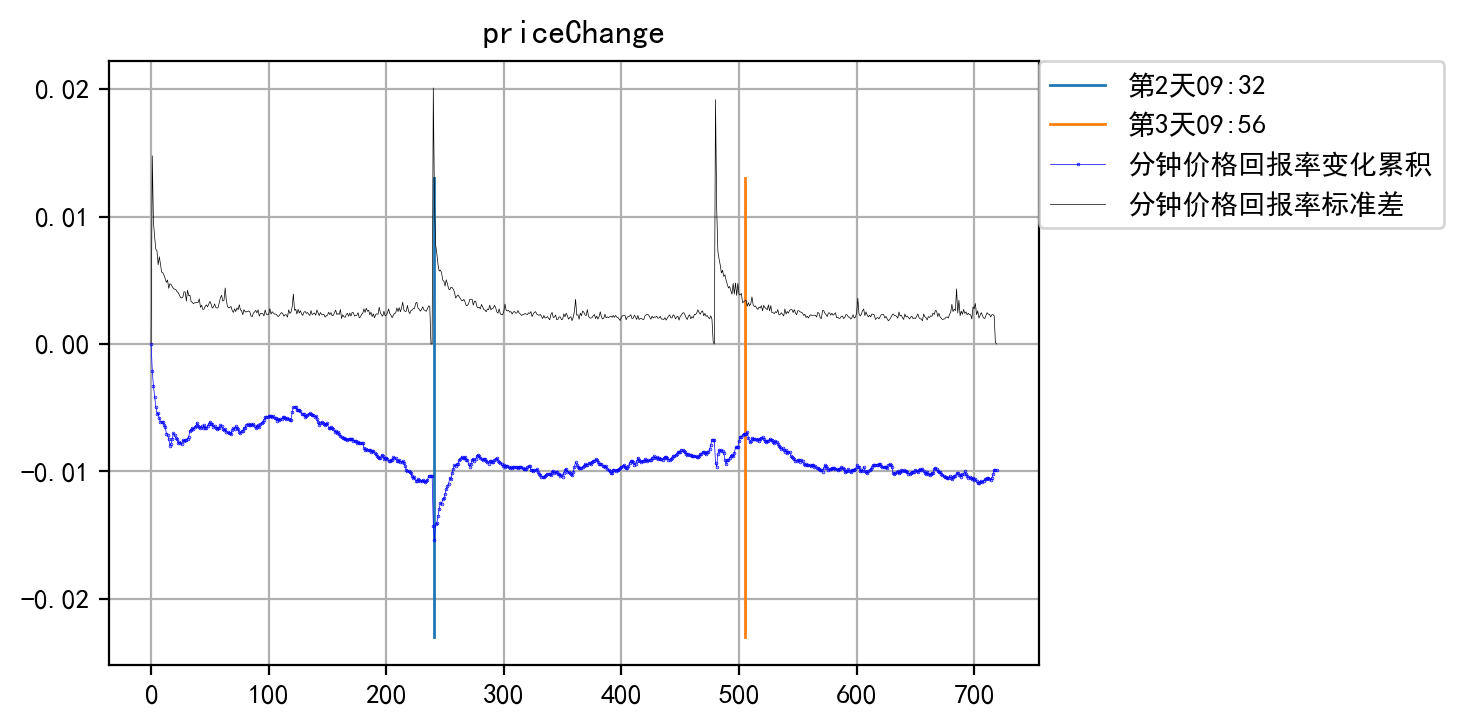

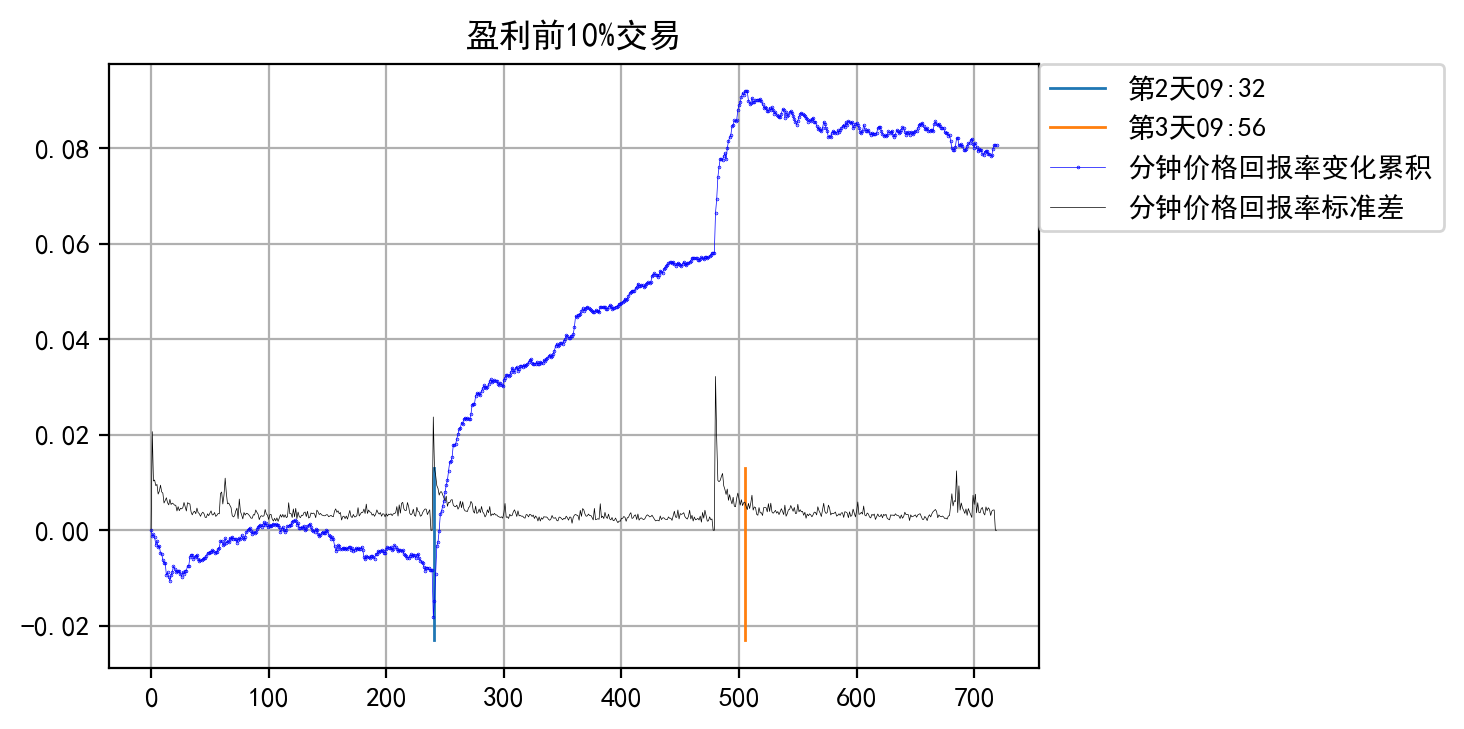

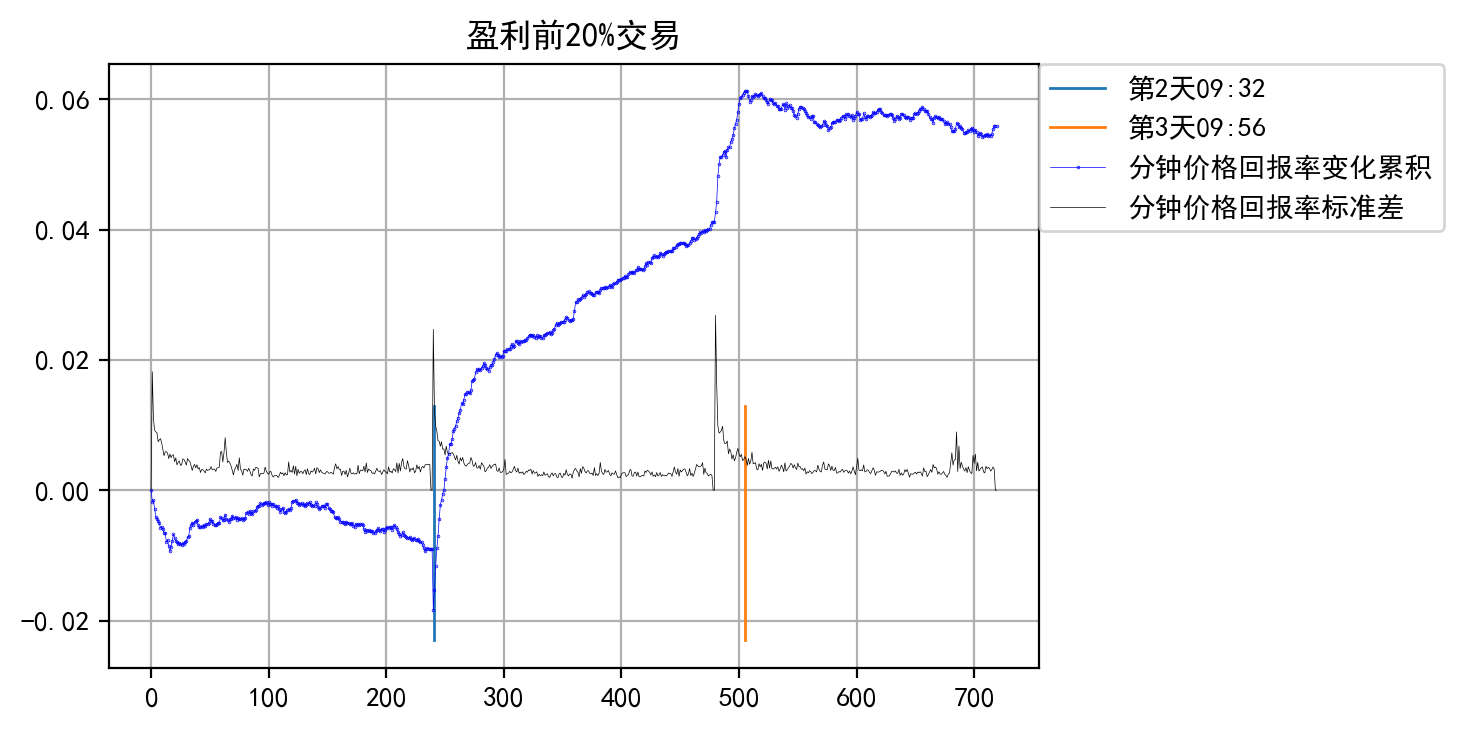

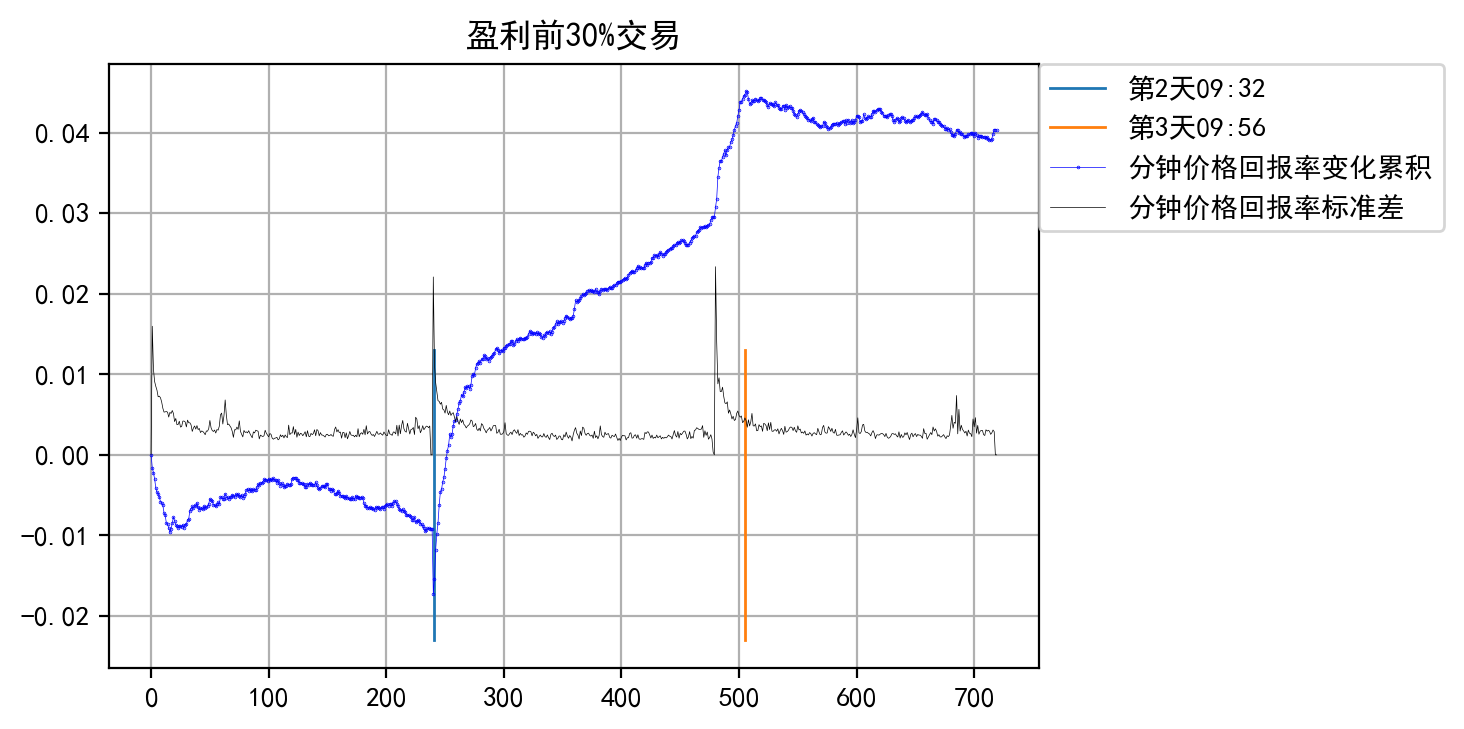

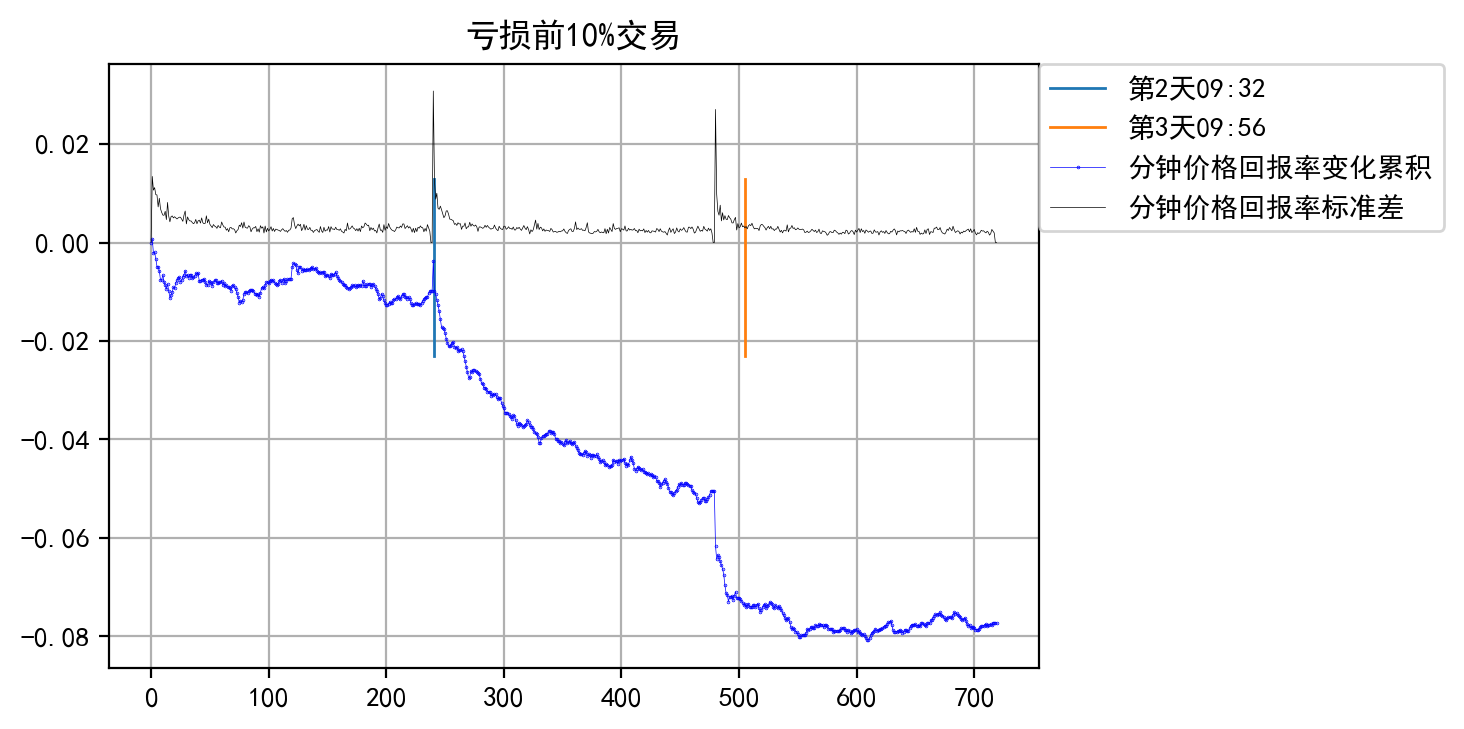

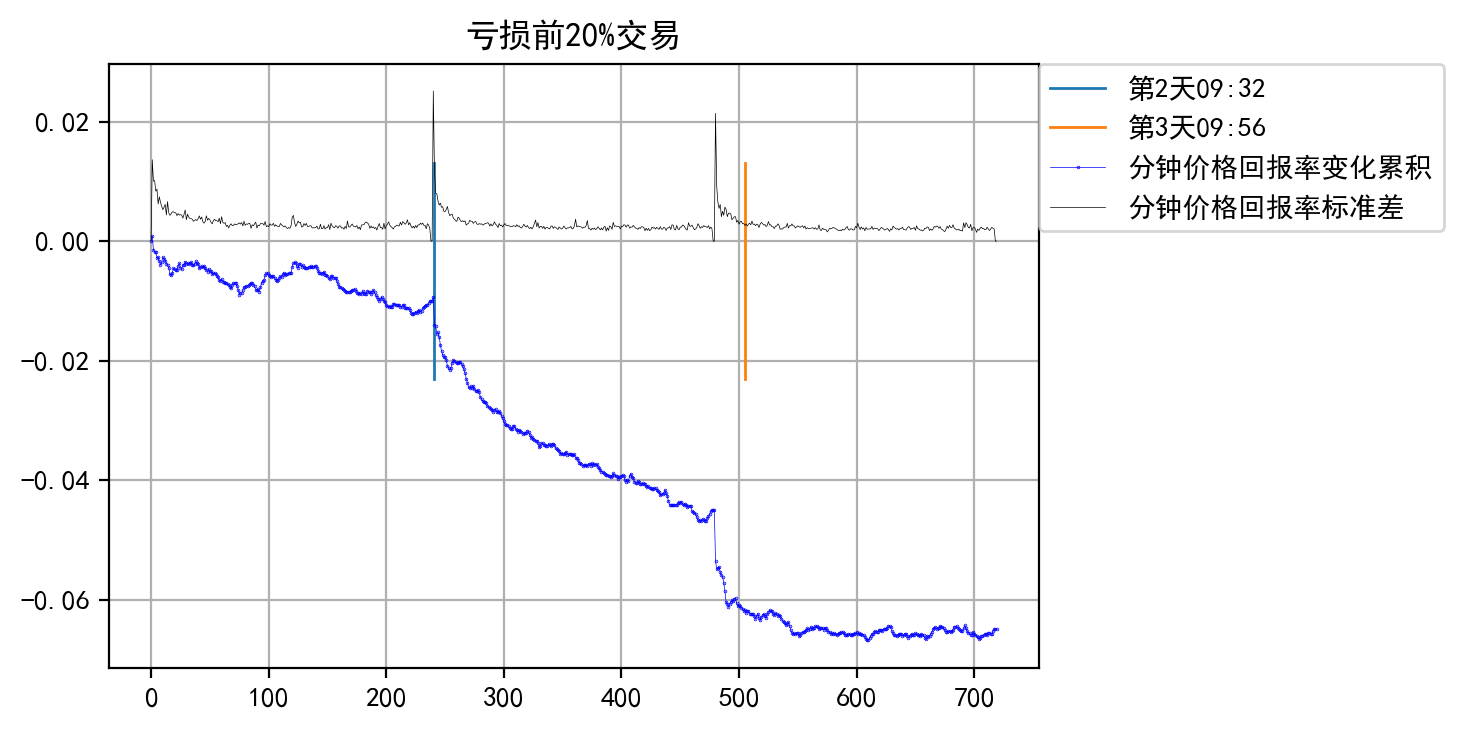

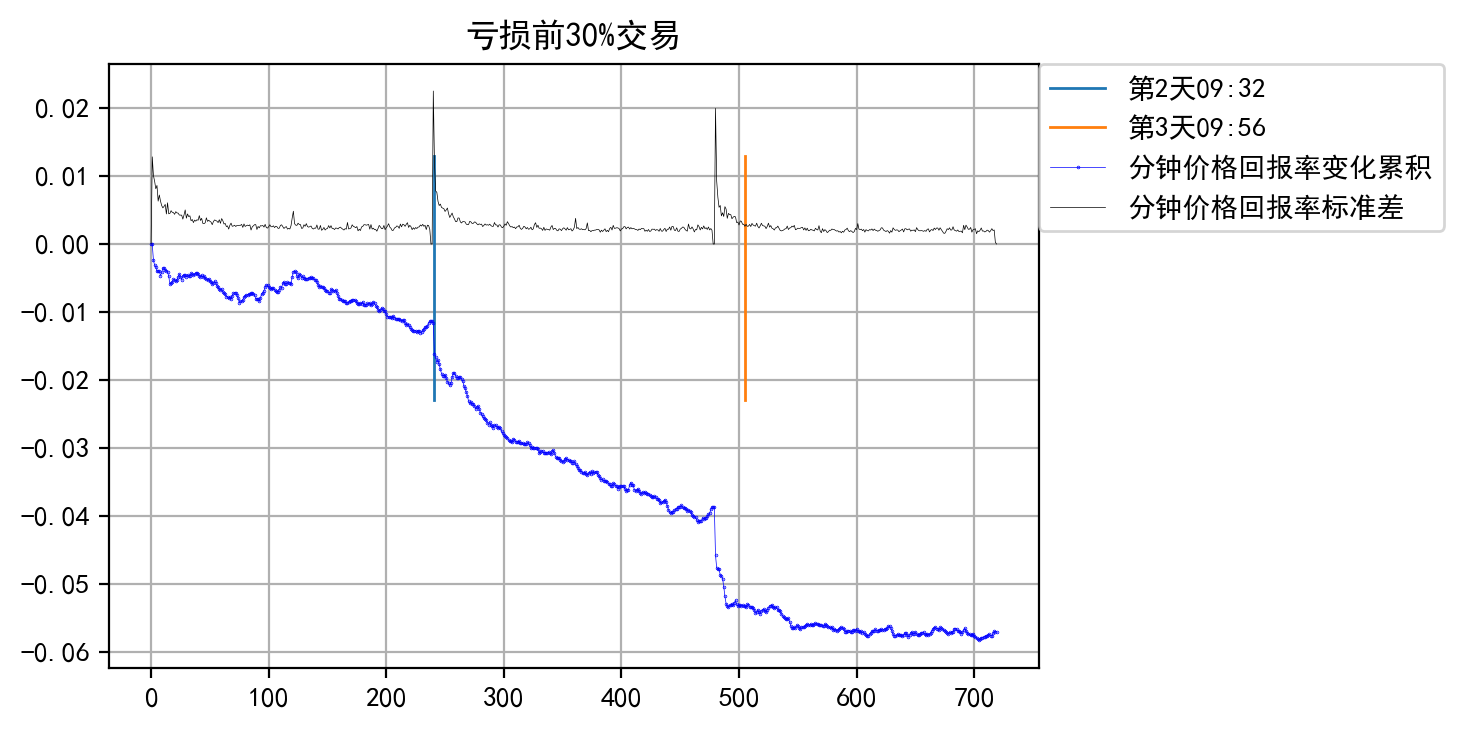

In [69]:

h = np.max(np.cumsum(r[:, :tradeArea[0]], axis=1), axis=1)
isZhangtingBeforeTradeArea = h>=0.05
p = np.sum(r[:, tradeArea[0]:tradeArea[1]], axis=1)
u = np.quantile(p,0.9)
u2 = np.quantile(p,0.8)
u3 = np.quantile(p,0.7)
l = np.quantile(p,0.1)
l2 = np.quantile(p,0.2)
l3 = np.quantile(p,0.3)
rGood = r[p>=u,:]
rGood2 = r[p>=u2,:]
rGood3 = r[p>=u3,:]
rBad = r[p<=l, :]
rBad2 = r[p<=l2, :]
rBad3 = r[p<=l3, :]
#for (i,x) in enumerate(tradesUsed):
#    if p[i]>u:
#        print('good trade:', x['name'], x['dateIn'],p[i],isZhangtingBeforeTradeArea[i])
#    if p[i]<l:
#        print('bad trade:', x['name'], x['dateIn'], p[i],isZhangtingBeforeTradeArea[i])
importlib.reload(rschLib)
rschLib.drawPriceChange(r, strategy_name, timeLabels=timeLabels, tp=tradeArea)
rschLib.drawPriceChange(rGood, strategy_name, timeLabels=timeLabels, title='盈利前10%交易', tp=tradeArea)
rschLib.drawPriceChange(rGood2, strategy_name, timeLabels=timeLabels, title='盈利前20%交易', tp=tradeArea)
rschLib.drawPriceChange(rGood3, strategy_name, timeLabels=timeLabels, title='盈利前30%交易', tp=tradeArea)
rschLib.drawPriceChange(rBad, strategy_name, timeLabels=timeLabels, title='亏损前10%交易', tp=tradeArea)
rschLib.drawPriceChange(rBad2, strategy_name, timeLabels=timeLabels, title='亏损前20%交易', tp=tradeArea)
rschLib.drawPriceChange(rBad3, strategy_name, timeLabels=timeLabels, title='亏损前30%交易', tp=tradeArea)


In [83]:
importlib.reload(rschLib)
[dtesPnl,pnl, numTrades]=rschLib.getPnl(dtes,tkrs, name, trades, inTime, otTime, dayOff, timeAsFloat, toDatabase='yes')

{'_id': ObjectId('5d11ceb09d32b009500db90c'), 'ticker': 'SH600548', 'open': 9.47, 'close': 9.46}
{'_id': ObjectId('5d11d3e69d32b009501ac754'), 'ticker': 'SH600548', 'open': 9.37, 'close': 9.36}
20190219 深高速   20190220.0932 价 9.47 20190221.0956 价 9.37 利润 -1.06 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d11d1639d32b0095014940c'), 'ticker': 'SZ002414', 'open': 22.87, 'close': 22.85}
{'_id': ObjectId('5d11d6d89d32b0095021a614'), 'ticker': 'SZ002414', 'open': 23.72, 'close': 23.8}
20190219 高德红外 20190220.0932 价 22.87 20190221.0956 价 23.72 利润 3.72 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d11da9d9d32b009502a53dc'), 'ticker': 'SH603222', 'open': 15.3, 'close': 15.25}
{'_id': ObjectId('5d11e01b9d32b009503769a4'), 'ticker': 'SH603222', 'open': 15.47, 'close': 15.48}
20190221 济民制药 20190222.0932 价 15.3 20190225.0956 价 15.47 利润 1.11 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d11dcb49d32b009502f6a0c'), 'ticker': 'SZ002602', 'open': 22.04, 'close': 21.88}
{'_id': ObjectId('5d11e2559d32b009503c7d04'), 'ticker': 'SZ002602', 

{'_id': ObjectId('5d125b9b9d32b009503dfb5c'), 'ticker': 'SH603888', 'open': 25.53, 'close': 25.55}
{'_id': ObjectId('5d12628c9d32b009504b0a94'), 'ticker': 'SH603888', 'open': 24.63, 'close': 24.58}
20190322 新华网   20190325.0932 价 25.53 20190326.0956 价 24.63 利润 -3.53 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d12795f9d32b00950765b3c'), 'ticker': 'SZ002643', 'open': 12.59, 'close': 12.55}
{'_id': ObjectId('5d1280209d32b00950836a74'), 'ticker': 'SZ002643', 'open': 12.95, 'close': 12.96}
20190328 万润股份 20190329.0932 价 12.59 20190401.0956 价 12.95 利润 2.86 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d127c0a9d32b009507ba5ec'), 'ticker': 'SH600519', 'open': 860.0, 'close': 857.0}
{'_id': ObjectId('5d1282d69d32b0095088b8e4'), 'ticker': 'SH600519', 'open': 846.85, 'close': 846.0}
20190329 贵州茅台 20190401.0932 价 860.0 20190402.0956 价 846.85 利润 -1.53 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d127fcb9d32b0095082cfac'), 'ticker': 'SZ002475', 'open': 24.77, 'close': 24.86}
{'_id': ObjectId('5d1286929d32b009508fe574'), 'ticker': 

{'_id': ObjectId('5d13412f9d32b0386cc262a9'), 'ticker': 'SH600111', 'open': 13.14, 'close': 13.19}
20190522 北方稀土 20190523.0932 价 12.9 20190524.0956 价 13.14 利润 1.86 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d1358f29d32b0386c0a9831'), 'ticker': 'SZ000876', 'open': 19.4, 'close': 19.15}
{'_id': ObjectId('5d135d409d32b0386c17c389'), 'ticker': 'SZ000876', 'open': 20.9, 'close': 20.88}
20190530 新 希 望 20190531.0932 价 19.4 20190603.0956 价 20.9 利润 7.73 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d1370909d32b0386c5393a1'), 'ticker': 'SH600206', 'open': 13.22, 'close': 13.1}
{'_id': ObjectId('5d1374c49d32b0386c60bef9'), 'ticker': 'SH600206', 'open': 14.82, 'close': 14.69}
20190610 有研新材 20190611.0932 价 13.22 20190612.0956 价 14.82 利润 12.1 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d137acc9d32b0386c73dca1'), 'ticker': 'SZ000831', 'open': 18.16, 'close': 18.2}
{'_id': ObjectId('5d137f159d32b0386c8108e9'), 'ticker': 'SZ000831', 'open': 17.84, 'close': 18.09}
20190612 五矿稀土 20190613.0932 价 18.16 20190614.0956 价 17.84 利润 -1.76 

{'_id': ObjectId('5d2b7390e23f1d523060f577'), 'ticker': 'SZ002791', 'open': 18.61, 'close': 18.65}
{'_id': ObjectId('5d2b76d7e23f1d52306e2edf'), 'ticker': 'SZ002791', 'open': 17.57, 'close': 17.55}
20190703 坚朗五金 20190704.0932 价 18.61 20190705.0956 价 17.57 利润 -5.59 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d2b7db1e23f1d5230886297'), 'ticker': 'SZ002726', 'open': 12.28, 'close': 12.13}
{'_id': ObjectId('5d2b813be23f1d523095983f'), 'ticker': 'SZ002726', 'open': 12.58, 'close': 12.6}
20190708 龙大肉食 20190709.0932 价 12.28 20190710.0956 价 12.58 利润 2.44 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d2b8324e23f1d52309c9c67'), 'ticker': 'SH601799', 'open': 78.93, 'close': 78.82}
{'_id': ObjectId('5d2c25a0e23f1d1abc5988ef'), 'ticker': 'SH601799', 'open': 78.65, 'close': 78.68}
20190710 星宇股份 20190711.0932 价 78.93 20190712.0956 价 78.65 利润 -0.35 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d3aad12e23f1d1c388fe99c'), 'ticker': 'SH600984', 'open': 8.28, 'close': 8.26}
{'_id': ObjectId('5d3eb727e23f1d1ee0110e44'), 'ticker': 'SH600

{'_id': ObjectId('5d847a4b34b93e2aec02ffff'), 'ticker': 'SH603377', 'open': 19.72, 'close': 19.46}
{'_id': ObjectId('5d886edd34b93e4950c2970e'), 'ticker': 'SH603377', 'open': 20.16, 'close': 20.18}
20190919 东方时尚 20190920.0932 价 19.72 20190923.0956 价 20.16 利润 2.23 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d886ef334b93e4950c2ee26'), 'ticker': 'SH603638', 'open': 27.36, 'close': 27.42}
{'_id': ObjectId('5d89c17134b93e5124a1634f'), 'ticker': 'SH603638', 'open': 26.9, 'close': 26.9}
20190920 艾迪精密 20190923.0932 价 27.36 20190924.0956 价 26.9 利润 -1.68 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d886f0634b93e4950c33b06'), 'ticker': 'SH603806', 'open': 44.76, 'close': 44.56}
{'_id': ObjectId('5d89c18a34b93e5124a1b02f'), 'ticker': 'SH603806', 'open': 45.29, 'close': 45.14}
20190920 福斯特   20190923.0932 价 44.76 20190924.0956 价 45.29 利润 1.18 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5d88708734b93e4950c9323b'), 'ticker': 'SZ300136', 'open': 36.5, 'close': 36.47}
{'_id': ObjectId('5d89c36234b93e5124a7a675'), 'ticker': 'SZ3001

{'_id': ObjectId('5dd6381234b93e510046f0bb'), 'ticker': 'SZ000035', 'open': 6.75, 'close': 6.79}
{'_id': ObjectId('5dd788fd34b93e523894ece3'), 'ticker': 'SZ000035', 'open': 6.84, 'close': 6.85}
20191120 中国天楹 20191121.0932 价 6.75 20191122.0956 价 6.84 利润 1.33 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5ddb7cd234b93e5d34a61047'), 'ticker': 'SH600745', 'open': 90.2, 'close': 90.9}
{'_id': ObjectId('5ddcce3f34b93e4e844d7283'), 'ticker': 'SH600745', 'open': 87.9, 'close': 87.73}
20191122 闻泰科技 20191125.0932 价 90.2 20191126.0956 价 87.9 利润 -2.55 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5ddb7ee934b93e5d34aed95d'), 'ticker': 'SZ300142', 'open': 31.4, 'close': 31.25}
{'_id': ObjectId('5ddcd07734b93e4e84563c89'), 'ticker': 'SZ300142', 'open': 31.14, 'close': 31.03}
20191122 沃森生物 20191125.0932 价 31.4 20191126.0956 价 31.14 利润 -0.83 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5de0c33e34b93e2f68614065'), 'ticker': 'SH603005', 'open': 28.28, 'close': 28.43}
{'_id': ObjectId('5de4b9a534b93e2e54c8bdff'), 'ticker': 'SH603005', 'ope

{'_id': ObjectId('5e16d0ce34b93e61e8cfdbee'), 'ticker': 'SH601808', 'open': 19.02, 'close': 18.95}
{'_id': ObjectId('5e18220534b93e4ca0539f36'), 'ticker': 'SH601808', 'open': 18.95, 'close': 18.91}
20200108 中海油服 20200109.0932 价 19.02 20200110.0956 价 18.95 利润 -0.37 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5e16d15234b93e61e8d20ba0'), 'ticker': 'SZ000100', 'open': 4.83, 'close': 4.83}
{'_id': ObjectId('5e18228a34b93e4ca055cee8'), 'ticker': 'SZ000100', 'open': 4.71, 'close': 4.71}
20200108 TCL科技 20200109.0932 价 4.83 20200110.0956 价 4.71 利润 -2.48 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5e1d68e634b93e65ac3ecac7'), 'ticker': 'SH603919', 'open': 19.42, 'close': 19.35}
{'_id': ObjectId('5e1eba0934b93e557c60f9e9'), 'ticker': 'SH603919', 'open': 19.3, 'close': 19.29}
20200113 金徽酒   20200114.0932 价 19.42 20200115.0956 价 19.3 利润 -0.62 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5e1d6a6e34b93e65ac454f8d'), 'ticker': 'SZ300347', 'open': 70.18, 'close': 70.6}
{'_id': ObjectId('5e1ebb9934b93e557c677dc0'), 'ticker': 'SZ300347

{'_id': ObjectId('5e3d0db034b93e8f384071a6'), 'ticker': 'SZ002850', 'open': 63.37, 'close': 63.58}
20200205 科达利 20200206.0932 价 58.3 20200207.0956 价 63.37 利润 8.7 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5e3bbc5934b93e58cc53d810'), 'ticker': 'SZ300073', 'open': 32.9, 'close': 32.8}
{'_id': ObjectId('5e3d0ddb34b93e8f38412006'), 'ticker': 'SZ300073', 'open': 35.72, 'close': 35.99}
20200205 当升科技 20200206.0932 价 32.9 20200207.0956 价 35.72 利润 8.57 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5e3bbcac34b93e58cc5534d1'), 'ticker': 'SZ300451', 'open': 21.5, 'close': 21.9}
{'_id': ObjectId('5e3d0e3234b93e8f38427cc7'), 'ticker': 'SZ300451', 'open': 22.46, 'close': 22.57}
20200205 创业慧康 20200206.0932 价 21.5 20200207.0956 价 22.46 利润 4.47 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5e3d0cf334b93e8f383d7a2d'), 'ticker': 'SZ002019', 'open': 19.2, 'close': 19.2}
{'_id': ObjectId('5e41059834b93e901ced6463'), 'ticker': 'SZ002019', 'open': 19.15, 'close': 19.12}
20200206 亿帆医药 20200207.0932 价 19.2 20200210.0956 价 19.15 利润 -0.26 % 已经开仓

{'_id': ObjectId('5e5f536c34b93e8cc883b303'), 'ticker': 'SH600984', 'open': 13.31, 'close': 13.31}
{'_id': ObjectId('5e60a52134b93e5460337130'), 'ticker': 'SH600984', 'open': 13.72, 'close': 13.7}
20200303 建设机械 20200304.0932 价 13.31 20200305.0956 价 13.72 利润 3.08 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5e5f53b834b93e8cc884ec23'), 'ticker': 'SH603208', 'open': 84.97, 'close': 86.02}
{'_id': ObjectId('5e60a57a34b93e546034aa50'), 'ticker': 'SH603208', 'open': 91.6, 'close': 91.38}
20200303 江山欧派 20200304.0932 价 84.97 20200305.0956 价 91.6 利润 7.8 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5e5f541734b93e8cc8867404'), 'ticker': 'SZ000063', 'open': 51.6, 'close': 51.9}
{'_id': ObjectId('5e60a5ec34b93e5460363231'), 'ticker': 'SZ000063', 'open': 52.11, 'close': 51.9}
20200303 中兴通讯 20200304.0932 价 51.6 20200305.0956 价 52.11 利润 0.99 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5e5f548134b93e8cc8882f76'), 'ticker': 'SZ002065', 'open': 17.1, 'close': 17.15}
{'_id': ObjectId('5e60a66934b93e546037eda3'), 'ticker': 'SZ002065', 'o

{'_id': ObjectId('5ea1424234b93e11548bbdc0'), 'ticker': 'SZ300676', 'open': 117.01, 'close': 117.1}
20200421 华大基因 20200422.0932 价 106.28 20200423.0956 价 117.01 利润 10.1 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5ea28ed834b93eda1cc90a04'), 'ticker': 'SH600196', 'open': 36.18, 'close': 36.09}
{'_id': ObjectId('5ea6837034b93ec74442ff83'), 'ticker': 'SH600196', 'open': 35.71, 'close': 36.02}
20200423 复星医药 20200424.0932 价 36.18 20200427.0956 价 35.71 利润 -1.3 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5ea2911b34b93eda1cd102f6'), 'ticker': 'SZ002385', 'open': 9.26, 'close': 9.33}
{'_id': ObjectId('5ea685fc34b93ec7444af786'), 'ticker': 'SZ002385', 'open': 9.0, 'close': 9.04}
20200423 大北农 20200424.0932 价 9.26 20200427.0956 价 9.0 利润 -2.81 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5ea291db34b93eda1cd387f8'), 'ticker': 'SZ300122', 'open': 79.71, 'close': 79.3}
{'_id': ObjectId('5ea686c934b93ec7444d7c88'), 'ticker': 'SZ300122', 'open': 81.71, 'close': 82.6}
20200423 智飞生物 20200424.0932 价 79.71 20200427.0956 价 81.71 利润 2.51 % 

{'_id': ObjectId('5eec655b34b93e27a0fc6571'), 'ticker': 'SZ002410', 'open': 64.83, 'close': 64.94}
20200617 广联达 20200618.0932 价 62.73 20200619.0956 价 64.83 利润 3.35 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5eeb140c34b93e2af830007f'), 'ticker': 'SZ002690', 'open': 52.56, 'close': 52.05}
{'_id': ObjectId('5eec65ae34b93e27a0fd6743'), 'ticker': 'SZ002690', 'open': 52.5, 'close': 52.59}
20200617 美亚光电 20200618.0932 价 52.56 20200619.0956 价 52.5 利润 -0.11 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5eeb14d134b93e2af8327ef1'), 'ticker': 'SZ300413', 'open': 62.14, 'close': 62.27}
{'_id': ObjectId('5eec667834b93e27a0ffe5b5'), 'ticker': 'SZ300413', 'open': 65.03, 'close': 65.21}
20200617 芒果超媒 20200618.0932 价 62.14 20200619.0956 价 65.03 利润 4.65 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5eec63c334b93e27a0f735d2'), 'ticker': 'SH601801', 'open': 5.81, 'close': 5.7}
{'_id': ObjectId('5ef0583f34b93e0e8c7de5e0'), 'ticker': 'SH601801', 'open': 5.79, 'close': 5.75}
20200618 皖新传媒 20200619.0932 价 5.81 20200622.0956 价 5.79 利润 -0.34 % 已

{'_id': ObjectId('5f0ffdad34b93ef3bc924a69'), 'ticker': 'SZ002414', 'open': 34.8, 'close': 34.73}
20200714 高德红外 20200715.0932 价 38.32 20200716.0956 价 34.8 利润 -9.19 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5f0ead7834b93e067c2e2f24'), 'ticker': 'SZ002416', 'open': 9.05, 'close': 8.96}
{'_id': ObjectId('5f0ffdad34b93ef3bc924c49'), 'ticker': 'SZ002416', 'open': 8.61, 'close': 8.58}
20200714 爱施德 20200715.0932 价 9.05 20200716.0956 价 8.61 利润 -4.86 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5f0ead8634b93e067c2e5864'), 'ticker': 'SZ002461', 'open': 11.29, 'close': 11.33}
{'_id': ObjectId('5f0ffdb834b93ef3bc927589'), 'ticker': 'SZ002461', 'open': 11.3, 'close': 11.26}
20200714 珠江啤酒 20200715.0932 价 11.29 20200716.0956 价 11.3 利润 0.09 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5f0eae6034b93e067c30c9b5'), 'ticker': 'SZ300168', 'open': 26.68, 'close': 26.92}
{'_id': ObjectId('5f0ffe7034b93ef3bc94e6da'), 'ticker': 'SZ300168', 'open': 27.87, 'close': 27.76}
20200714 万达信息 20200715.0932 价 26.68 20200716.0956 价 27.87 利润 4.46 % 已经

{'_id': ObjectId('5f32028934b93e276ce6a53e'), 'ticker': 'SH600711', 'open': 6.05, 'close': 6.0}
{'_id': ObjectId('5f3206f534b93e276cf45b56'), 'ticker': 'SH600711', 'open': 6.02, 'close': 6.03}
20200728 盛屯矿业 20200729.0932 价 6.05 20200730.0956 价 6.02 利润 -0.5 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5f3202e034b93e276ce7a61e'), 'ticker': 'SH601168', 'open': 7.95, 'close': 7.97}
{'_id': ObjectId('5f32076c34b93e276cf55c36'), 'ticker': 'SH601168', 'open': 7.87, 'close': 7.87}
20200728 西部矿业 20200729.0932 价 7.95 20200730.0956 价 7.87 利润 -1.01 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5f3203ea34b93e276ceb0fde'), 'ticker': 'SZ000733', 'open': 33.17, 'close': 33.51}
{'_id': ObjectId('5f3208a234b93e276cf8c8c6'), 'ticker': 'SZ000733', 'open': 38.3, 'close': 38.09}
20200728 振华科技 20200729.0932 价 33.17 20200730.0956 价 38.3 利润 15.47 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5f32071634b93e276cf4af9e'), 'ticker': 'SH600809', 'open': 172.25, 'close': 174.35}
{'_id': ObjectId('5f320bd734b93e276c026976'), 'ticker': 'SH600809', 'ope

{'_id': ObjectId('5f61b32134b93e6f0c61cb9d'), 'ticker': 'SZ000066', 'open': 18.99, 'close': 18.91}
20200810 中国长城 20200811.0932 价 20.38 20200812.0956 价 18.99 利润 -6.82 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5f61ae1234b93e6f0c54aa95'), 'ticker': 'SZ000672', 'open': 29.6, 'close': 29.75}
{'_id': ObjectId('5f61b35f34b93e6f0c626fad'), 'ticker': 'SZ000672', 'open': 27.52, 'close': 27.49}
20200810 上峰水泥 20200811.0932 价 29.6 20200812.0956 价 27.52 利润 -7.03 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5f61b20c34b93e6f0c5ee145'), 'ticker': 'SH600970', 'open': 6.41, 'close': 6.53}
{'_id': ObjectId('5f61b70b34b93e6f0c6ca56d'), 'ticker': 'SH600970', 'open': 6.47, 'close': 6.43}
20200811 中材国际 20200812.0932 价 6.41 20200813.0956 价 6.47 利润 0.94 % 已经开仓 1 已经平仓 1
{'_id': ObjectId('5f61b55d34b93e6f0c67c0d5'), 'ticker': 'SZ300274', 'open': 23.04, 'close': 22.86}
{'_id': ObjectId('5f61ba0b34b93e6f0c7584fd'), 'ticker': 'SZ300274', 'open': 21.42, 'close': 21.39}
20200811 阳光电源 20200812.0932 价 23.04 20200813.0956 价 21.42 利润 -7.03 

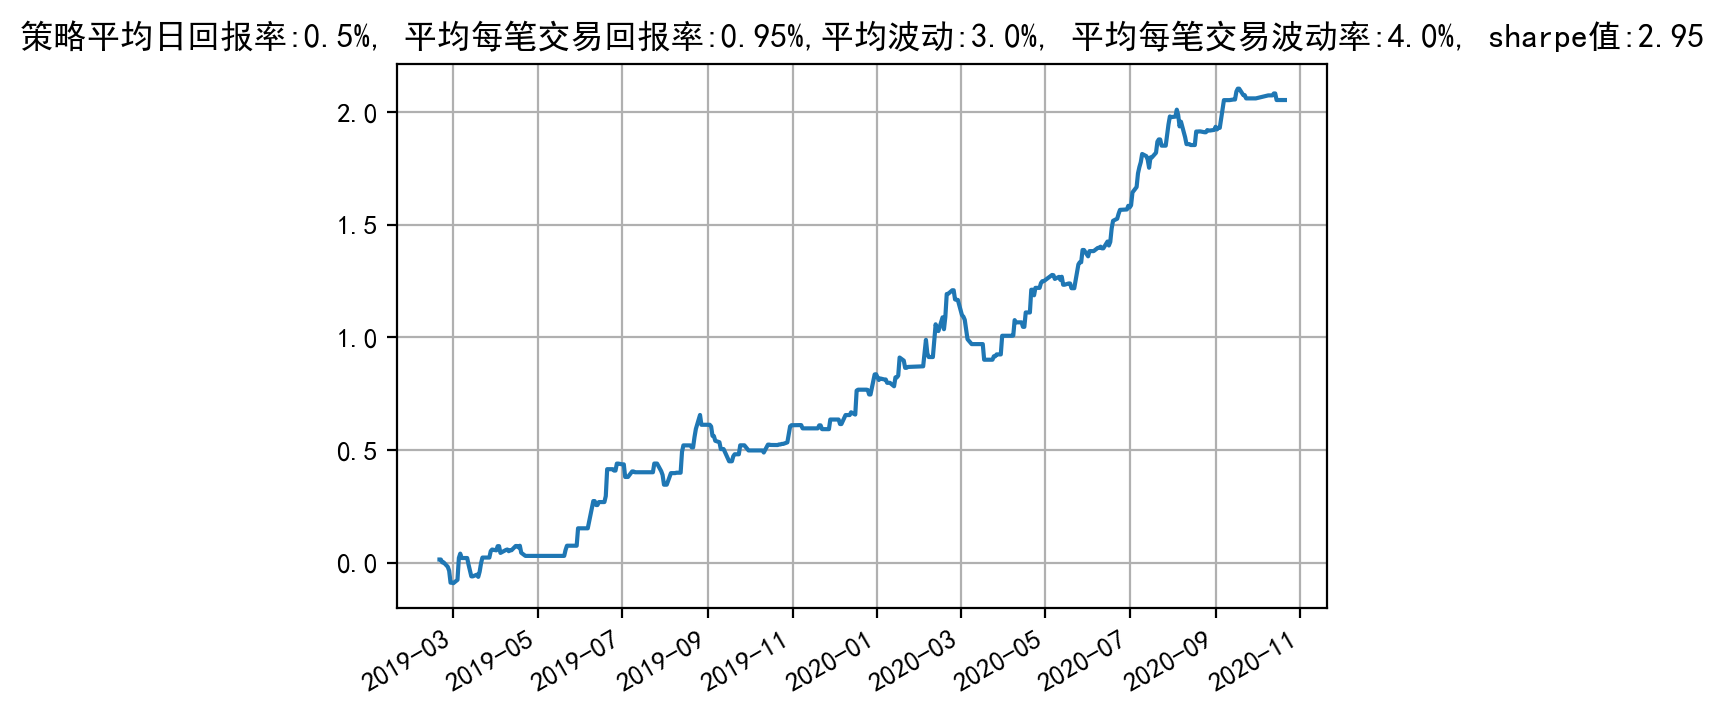

In [81]:
importlib.reload(rschLib)
rschLib.drawPNL(dtesPnl, pnl, dtes, strategy_name, toDatabase='yes')

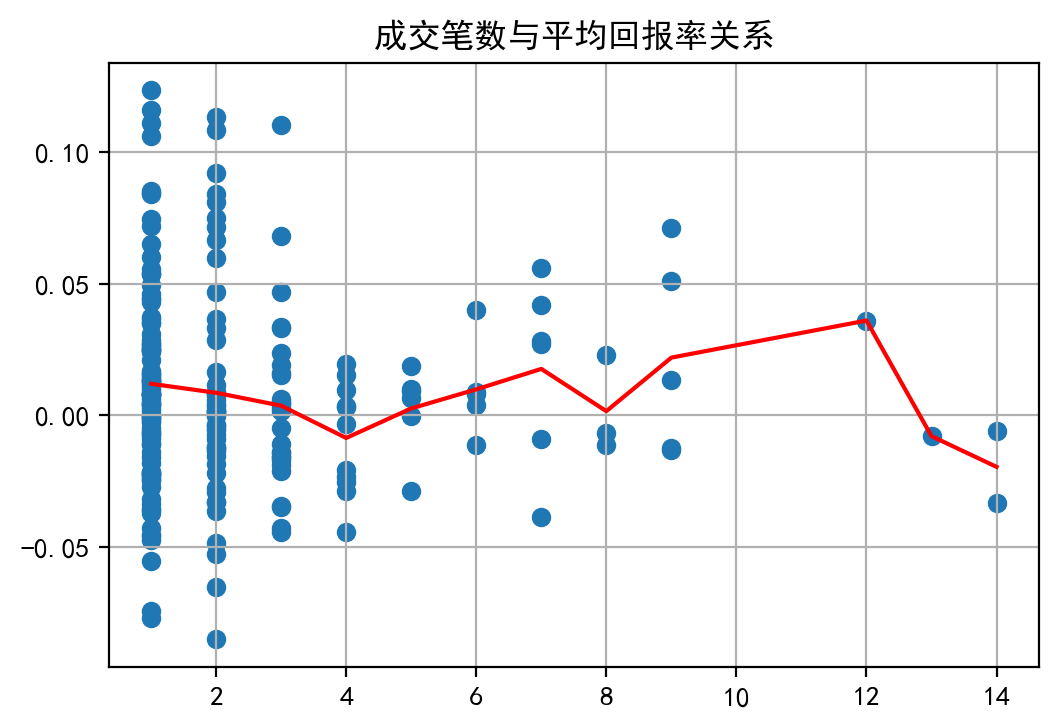

In [57]:
importlib.reload(rschLib)
rschLib.pnlVsNumtrades(pnl, numTrades)

In [58]:
# %load_ext line_profiler
# #%lprun -f getPnl getPnl()